In [1]:
import numpy as np
import cPickle as pickle
from matplotlib.pylab import plt
%matplotlib inline

In [2]:
with open("/home/dmoore/python/sigvisa/logs/mcmc/01156/step_000111/pickle.sg", "rb") as f:
    sg1 = pickle.load(f)

with open("/home/dmoore/python/sigvisa/logs/mcmc/01156/step_000110/pickle.sg", "rb") as f:
    sg2 = pickle.load(f)

    

In [3]:
wn1 = sg1.station_waves["NV01"][0]
wn2 = sg2.station_waves["NV01"][0]

reading station detections... 


/home/dmoore/python/sigvisa/models/signal_model.py:599: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return TransientCombinedSSM(components, TSSM_NOISE_PADDING)


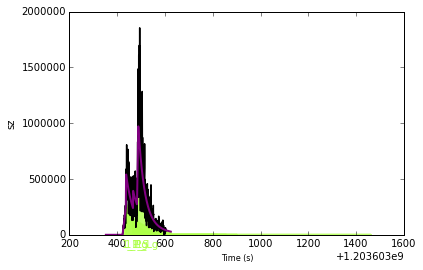

In [6]:
f = plt.figure()
ax = f.add_subplot(111)
wn1.plot(ax=ax)

plotting uatemplate -1 as color (0.0, 0.50392156862745097, 1.0, 1.0)
reading station detections... 


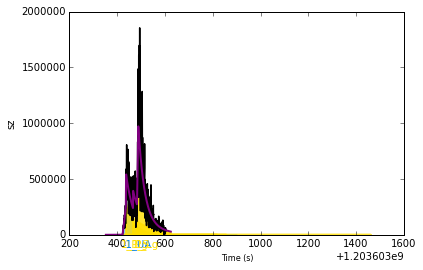

In [7]:
f = plt.figure()
ax = f.add_subplot(111)
wn2.plot(ax=ax)

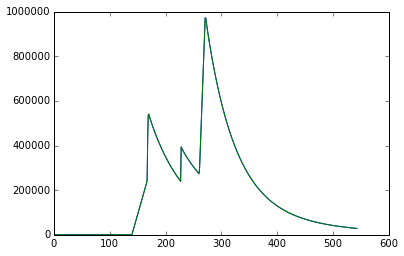

In [12]:
plt.plot(wn1.tssm.mean_obs(wn1.npts))
plt.plot(wn2.tssm.mean_obs(wn1.npts))

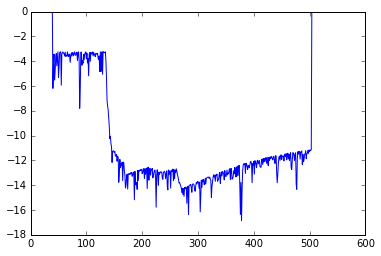

In [16]:
lls, _, _ = wn2.tssm.step_obs_likelihoods(wn2.get_value().data)
plt.plot(lls)

139


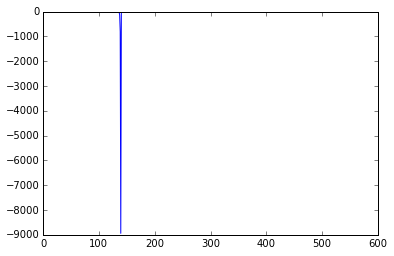

In [18]:
lls, _, _ = wn1.tssm.step_obs_likelihoods(wn1.get_value().data)
plt.plot(lls)
print np.argmin(lls)

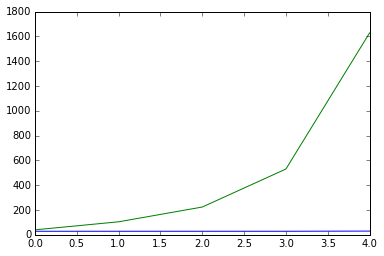

In [25]:
plt.plot(wn1.tssm.mean_obs(wn1.npts)[135:140])
plt.plot(wn1.get_value().data[135:140])

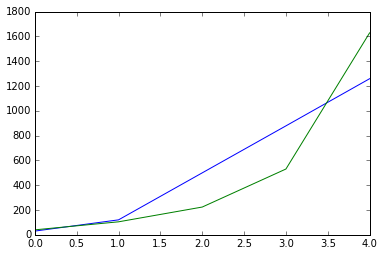

In [26]:
plt.plot(wn2.tssm.mean_obs(wn2.npts)[135:140])
plt.plot(wn2.get_value().data[135:140])

In [51]:

with open("/home/dmoore/python/sigvisa/logs/mcmc/01158.1/step_000034/pickle.sg", "rb") as f:
    sg = pickle.load(f)
wn = sg.station_waves["NV01"][0]

reading station detections... 


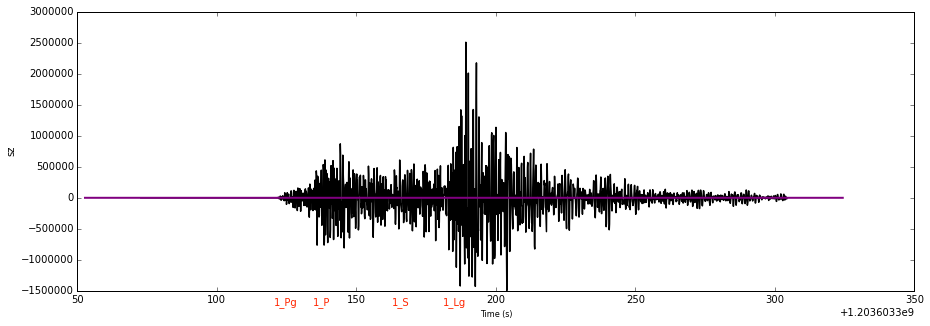

In [52]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(111)
wn.plot(ax=ax)

In [53]:
sg.current_log_p_breakdown()

loading model 28717
loading model 28710
loading model 28731
loading model 28724
loading model 28738
loading model 28721
loading model 28714
loading model 28735
loading model 28728
loading model 28742
loading model 28718
loading model 28711
loading model 28732
loading model 28725
loading model 28739
loading model 28723
loading model 28716
loading model 28737
loading model 28730
loading model 28744
n_uatemplate: -0.0
n_event: -7.1
ev priors: ev -9.8
ev observations: ev 0.0
phase existence: ev -0.0
tt_residual: ev -15.0
ev global cost (n + priors + phases + tt): -31.9
coda_decay: ev -3.5 ua 0.0 total -3.5
peak_decay: ev -5.0 ua 0.0 total -5.0
peak_offset: ev -4.4 ua 0.0 total -4.4
coda_height: ev -30.0 ua 0.0 total -30.0
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -42.8 ua 0.0 total -42.8
priors+params: ev -74.7 ua -0.0 total -74.7
station noise (observed signals): -26819.6
noise model prior lp: -8.7
overall: -26903.0
official: -26903.0



'n_uatemplate: -0.0\nn_event: -7.1\nev priors: ev -9.8\nev observations: ev 0.0\nphase existence: ev -0.0\ntt_residual: ev -15.0\nev global cost (n + priors + phases + tt): -31.9\ncoda_decay: ev -3.5 ua 0.0 total -3.5\npeak_decay: ev -5.0 ua 0.0 total -5.0\npeak_offset: ev -4.4 ua 0.0 total -4.4\ncoda_height: ev -30.0 ua 0.0 total -30.0\nmult_std_wiggle: ev 0.0 ua 0.0 total 0.0\ncoef jointgp: 0.0\ntotal param: ev -42.8 ua 0.0 total -42.8\npriors+params: ev -74.7 ua -0.0 total -74.7\nstation noise (observed signals): -26819.6\nnoise model prior lp: -8.7\noverall: -26903.0\nofficial: -26903.0\n'

In [54]:
pvals = sg.get_template_vals(1, wn.sta, "P", wn.band, wn.chan)
pgvals = sg.get_template_vals(1, wn.sta, "Pg", wn.band, wn.chan)
print pvals
print pgvals

{'amp_transfer': 13.321151056752692, 'coda_decay': -3.4573001490393906, 'peak_offset': 1.112580055707947, 'coda_height': 12.974724952168952, 'arrival_time': 1203603434.2507825, 'tt_residual': 11.508780290686587, 'peak_decay': -3.0310867352539033}
{'amp_transfer': 12.528899710554319, 'coda_decay': -3.4903531479157408, 'peak_offset': 3.0282630221595355, 'coda_height': 12.182473605970578, 'arrival_time': 1203603420.4251962, 'tt_residual': -12.822200417187418, 'peak_decay': -3.1999361885680502}


In [55]:
pnodes = sg.get_template_nodes(1, wn.sta, "P", wn.band, wn.chan)
pgnodes = sg.get_template_nodes(1, wn.sta, "Pg", wn.band, wn.chan)
plps = [(p, n.log_p()) for (p, (k, n)) in pnodes.items() if not n.deterministic()]
pglps = [(p, n.log_p()) for (p, (k, n)) in pgnodes.items() if not n.deterministic()]

print plps
print pglps

[('amp_transfer', -10.902282627284073), ('coda_decay', -1.1271457892271706), ('peak_offset', -1.2560507416731568), ('tt_residual', -3.9620192134883547), ('peak_decay', -0.98500220195132704)]
[('amp_transfer', -5.2675935606126814), ('coda_decay', -0.32142145741612593), ('peak_offset', -1.1232096614257154), ('tt_residual', -4.8732480025526979), ('peak_decay', -1.2887096993206781)]


In [56]:
[n.set_value(pvals[p]) for (p, (k, n)) in pgnodes.items() if p not in ("tt_residual", "amp_transfer")]
[n.set_value(pgvals[p]) for (p, (k, n)) in pnodes.items() if p not in ("tt_residual", "amp_transfer")]


[None, None, None, None, None]

In [58]:
print [(p, n.log_p()) for (p, (k, n)) in pnodes.items() if not n.deterministic()]
print [(p, n.log_p()) for (p, (k, n)) in pgnodes.items() if not n.deterministic()]


[('amp_transfer', -8.0203832981046546), ('coda_decay', -1.1236617278358807), ('peak_offset', -7.0519388929264757), ('tt_residual', -3.2921377385305686), ('peak_decay', -0.9336294265027788)]
[('amp_transfer', -8.2241469227096715), ('coda_decay', -0.29324196228030963), ('peak_offset', -2.1062598468249165), ('tt_residual', -2.6630064729442555), ('peak_decay', -1.2347348714251258)]


In [50]:
print [(p, n.get_value(), n.log_p()) for (p, (k, n)) in pnodes.items() if not n.deterministic()]
print [(p, n.get_value(), n.log_p()) for (p, (k, n)) in pgnodes.items() if not n.deterministic()]


[('amp_transfer', 12.528899710554319, -8.0203832981046546), ('coda_decay', -3.4903531479157408, -1.1236617278358807), ('peak_offset', 3.0282630221595355, -7.0519388929264757), ('tt_residual', -12.822200417187418, -4.8631536517140592), ('peak_decay', -3.1999361885680502, -0.9336294265027788)]
[('amp_transfer', 13.321151056752692, -8.2241469227096715), ('coda_decay', -3.4573001490393906, -0.29324196228030963), ('peak_offset', 1.112580055707947, -2.1062598468249165), ('tt_residual', 11.508780290686587, -5.1408551388536967), ('peak_decay', -3.0310867352539033, -1.2347348714251258)]
